In [1]:
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [30]:
audit_risk = pd.read_csv('audit_data/audit_risk.csv')
trial = pd.read_csv('audit_data/trial.csv')

In [32]:
audit_risk.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [31]:
trial.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [33]:
audit_risk.shape

(776, 27)

In [34]:
trial.shape

(776, 18)

In [35]:
audit_risk.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [36]:
trial.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


2 dataframe have almost simmilar column names with a little bit of difference. lets finish those differce and then marge those two dataframes

In [37]:
#Renaming columns
trial.columns = ['Sector_score','LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B',
       'Score_B',  'TOTAL', 'numbers', 'Marks',
       'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk_trial' ]

In [38]:
trial['Score_A'] = trial['Score_A']/10
trial['Score_B'] = trial['Score_B']/10

In [40]:
#common columns between 2 dataframes.....to use them as primary key to merge leter
same_columns = np.intersect1d(audit_risk.columns, trial.columns)
same_columns

array(['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B',
       'Score', 'Score_A', 'Score_B', 'Sector_score', 'TOTAL', 'numbers'],
      dtype=object)

In [45]:
#Merging Dataframes...........
data = pd.merge(trial, audit_risk, how='outer', on = ['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B',
       'Score', 'Score_A', 'Score_B', 'Sector_score', 'TOTAL', 'numbers'])

In [46]:
data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,PARA_B,Score_B,TOTAL,numbers,Marks,Money_Value,...,District_Loss,PROB,RiSk_E,Prob,Risk_F,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.50,0.2,6.68,5.0,2,3.38,...,2,0.2,0.4,0.2,0.0,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,4.83,0.2,4.83,5.0,2,0.94,...,2,0.2,0.4,0.2,0.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.23,0.2,0.74,5.0,2,0.00,...,2,0.2,0.4,0.2,0.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,10.80,0.6,10.80,6.0,6,11.75,...,2,0.2,0.4,0.2,0.0,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.08,0.2,0.08,5.0,2,0.00,...,2,0.2,0.4,0.2,0.0,1.416,0.4,0.5,0.2832,0


In [47]:
data.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk_trial',
       'Risk_A', 'Risk_B', 'Score_B.1', 'Risk_C', 'Score_MV', 'Risk_D',
       'District_Loss', 'PROB', 'RiSk_E', 'Prob', 'Risk_F', 'Inherent_Risk',
       'CONTROL_RISK', 'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

In [48]:
# "Risk" and "Risk_trial" both represent the final result. lets keep the 1st one and drop the last one.
data = data.drop(['Risk_trial'], axis = 1)

In [49]:
data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,PARA_B,Score_B,TOTAL,numbers,Marks,Money_Value,...,District_Loss,PROB,RiSk_E,Prob,Risk_F,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.50,0.2,6.68,5.0,2,3.38,...,2,0.2,0.4,0.2,0.0,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,4.83,0.2,4.83,5.0,2,0.94,...,2,0.2,0.4,0.2,0.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.23,0.2,0.74,5.0,2,0.00,...,2,0.2,0.4,0.2,0.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,10.80,0.6,10.80,6.0,6,11.75,...,2,0.2,0.4,0.2,0.0,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.08,0.2,0.08,5.0,2,0.00,...,2,0.2,0.4,0.2,0.0,1.416,0.4,0.5,0.2832,0


In [50]:
data.shape

(810, 33)

In [51]:
# number of unique values
data.nunique()

Sector_score       13
LOCATION_ID        45
PARA_A            363
Score_A             3
PARA_B            358
Score_B             3
TOTAL             471
numbers             5
Marks               3
Money_Value       328
MONEY_Marks         3
District            3
Loss                3
LOSS_SCORE          3
History             7
History_score       3
Score              17
Risk_A            363
Risk_B            360
Score_B.1           3
Risk_C              5
Score_MV            3
Risk_D            328
District_Loss       3
PROB                3
RiSk_E              5
Prob                3
Risk_F              7
Inherent_Risk     584
CONTROL_RISK       11
Detection_Risk      1
Audit_Risk        601
Risk                2
dtype: int64

In [52]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe
data.Risk.value_counts()

0    503
1    307
Name: Risk, dtype: int64

In [53]:
# Normalized value counts
data.Risk.value_counts(normalize=True)

0    0.620988
1    0.379012
Name: Risk, dtype: float64

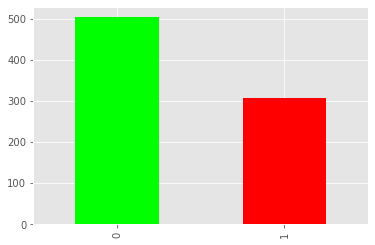

In [54]:
# Plot the value counts with a bar graph
data.Risk.value_counts().plot(kind="bar", color=["lime", "red"]);

# Missing values

In [55]:
#checking for missing values
data.isnull().sum() 

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
PARA_B            0
Score_B           0
TOTAL             0
numbers           0
Marks             0
Money_Value       1
MONEY_Marks       0
District          0
Loss              0
LOSS_SCORE        0
History           0
History_score     0
Score             0
Risk_A            0
Risk_B            0
Score_B.1         0
Risk_C            0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
Prob              0
Risk_F            0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

"Money_Value" has 1 missing value

In [56]:
#shows a quick insight to the number of missing values you have and what type of data your working with.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 809
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    810 non-null    float64
 1   LOCATION_ID     810 non-null    object 
 2   PARA_A          810 non-null    float64
 3   Score_A         810 non-null    float64
 4   PARA_B          810 non-null    float64
 5   Score_B         810 non-null    float64
 6   TOTAL           810 non-null    float64
 7   numbers         810 non-null    float64
 8   Marks           810 non-null    int64  
 9   Money_Value     809 non-null    float64
 10  MONEY_Marks     810 non-null    int64  
 11  District        810 non-null    int64  
 12  Loss            810 non-null    int64  
 13  LOSS_SCORE      810 non-null    int64  
 14  History         810 non-null    int64  
 15  History_score   810 non-null    int64  
 16  Score           810 non-null    float64
 17  Risk_A          810 non-null    flo

"LOCATION_ID" is "object" type....means non-numerical data. but it has numerical value :/

In [57]:
data.Money_Value.describe()

count    809.000000
mean      13.543466
std       65.251851
min        0.000000
25%        0.000000
50%        0.050000
75%        4.950000
max      935.030000
Name: Money_Value, dtype: float64

In [58]:
# filling the missing value with the mean value
data.Money_Value.fillna(data.Money_Value.mean(), inplace=True)

In [60]:
#checking if the missing value is filled
data.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
PARA_B            0
Score_B           0
TOTAL             0
numbers           0
Marks             0
Money_Value       0
MONEY_Marks       0
District          0
Loss              0
LOSS_SCORE        0
History           0
History_score     0
Score             0
Risk_A            0
Risk_B            0
Score_B.1         0
Risk_C            0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
Prob              0
Risk_F            0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [ ]:
#"Detection_Risk" have the same value for all tuples. so, it won't matter in the final result. lets drop it
data = data.drop(['Detection_Risk'], axis = 1) 

# non-Numerical Features Analysis

In [63]:
data.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk_A',
       'Risk_B', 'Score_B.1', 'Risk_C', 'Score_MV', 'Risk_D', 'District_Loss',
       'PROB', 'RiSk_E', 'Prob', 'Risk_F', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 809
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   810 non-null    float64
 1   LOCATION_ID    810 non-null    object 
 2   PARA_A         810 non-null    float64
 3   Score_A        810 non-null    float64
 4   PARA_B         810 non-null    float64
 5   Score_B        810 non-null    float64
 6   TOTAL          810 non-null    float64
 7   numbers        810 non-null    float64
 8   Marks          810 non-null    int64  
 9   Money_Value    810 non-null    float64
 10  MONEY_Marks    810 non-null    int64  
 11  District       810 non-null    int64  
 12  Loss           810 non-null    int64  
 13  LOSS_SCORE     810 non-null    int64  
 14  History        810 non-null    int64  
 15  History_score  810 non-null    int64  
 16  Score          810 non-null    float64
 17  Risk_A         810 non-null    float64
 18  Risk_B    

"LOCATION_ID" is "object" type....means non-numerical data. but it has numerical value :/

In [68]:
#Unique values in LOCATION_ID column
data["LOCATION_ID"].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

only 3 values are non-numerical.....lets find out the lengthof each of them.

In [78]:
len(data[(data["LOCATION_ID"] == 'LOHARU')])

1

In [79]:
len(data[(data["LOCATION_ID"] == 'NUH')])

1

In [80]:
len(data[(data["LOCATION_ID"] == 'SAFIDON')])

1

only 3 tupes have non-numerical value on "LOCATION_ID". lets drop these 3 rows

In [81]:
data = data[(data.LOCATION_ID != 'LOHARU')]
data = data[(data.LOCATION_ID != 'NUH')]
data = data[(data.LOCATION_ID != 'SAFIDON')]

In [82]:
# lets convert object type into numerical type
data = data.astype(float)

In [83]:
data.shape

(807, 32)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807 entries, 0 to 809
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   807 non-null    float64
 1   LOCATION_ID    807 non-null    float64
 2   PARA_A         807 non-null    float64
 3   Score_A        807 non-null    float64
 4   PARA_B         807 non-null    float64
 5   Score_B        807 non-null    float64
 6   TOTAL          807 non-null    float64
 7   numbers        807 non-null    float64
 8   Marks          807 non-null    float64
 9   Money_Value    807 non-null    float64
 10  MONEY_Marks    807 non-null    float64
 11  District       807 non-null    float64
 12  Loss           807 non-null    float64
 13  LOSS_SCORE     807 non-null    float64
 14  History        807 non-null    float64
 15  History_score  807 non-null    float64
 16  Score          807 non-null    float64
 17  Risk_A         807 non-null    float64
 18  Risk_B    

In [86]:
#Dropping duplicate values
data = data.drop_duplicates(keep = 'first')
data.shape

(760, 32)

In [87]:
data.nunique()

Sector_score      13
LOCATION_ID       42
PARA_A           362
Score_A            3
PARA_B           358
Score_B            3
TOTAL            470
numbers            5
Marks              3
Money_Value      328
MONEY_Marks        3
District           3
Loss               3
LOSS_SCORE         3
History            7
History_score      3
Score             17
Risk_A           362
Risk_B           360
Score_B.1          3
Risk_C             5
Score_MV           3
Risk_D           327
District_Loss      3
PROB               3
RiSk_E             5
Prob               3
Risk_F             7
Inherent_Risk    583
CONTROL_RISK      11
Audit_Risk       600
Risk               2
dtype: int64

# this is our final dataset. lets save it for later use

In [88]:
data.to_csv('audit.csv', index=False)

In [2]:
data = pd.read_csv("audit.csv")

# Numerical Features Analysis

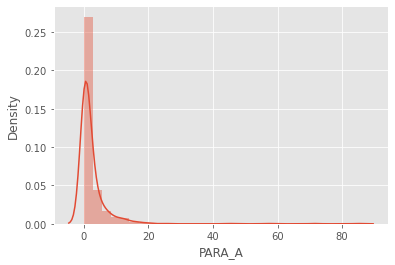

In [111]:
sns.distplot(data['PARA_A'],bins=30)
# sns.distplot(data['PARA_A'],bins=30, kde=False)
plt.show()

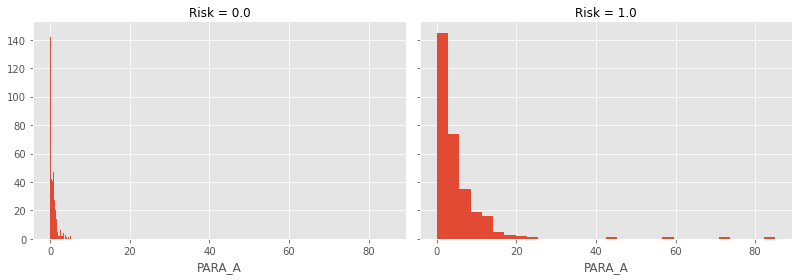

In [112]:
# distribution 
g = sns.FacetGrid(data, col='Risk',size=4, aspect=1.4)
g.map(plt.hist, 'PARA_A', bins=30)
plt.show()

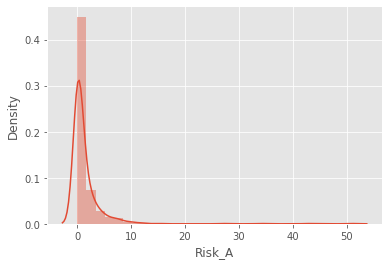

In [113]:
sns.distplot(data['Risk_A'],bins=30)
# sns.distplot(data['PARA_A'],bins=30, kde=False)
plt.show()

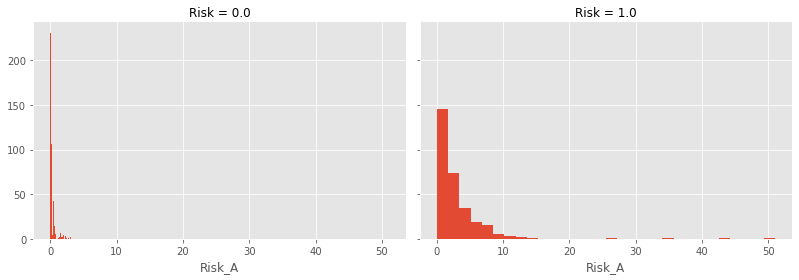

In [114]:
# distribution 
g = sns.FacetGrid(data, col='Risk',size=4, aspect=1.4)
g.map(plt.hist, 'Risk_A', bins=30)
plt.show()

In [115]:
data.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk_A',
       'Risk_B', 'Score_B.1', 'Risk_C', 'Score_MV', 'Risk_D', 'District_Loss',
       'PROB', 'RiSk_E', 'Prob', 'Risk_F', 'Inherent_Risk', 'CONTROL_RISK',
       'Audit_Risk', 'Risk'],
      dtype='object')

# how each columns affects the final results 

In [94]:

data.PARA_A.value_counts()

0.00     139
0.51       8
0.84       7
0.49       7
0.56       7
        ... 
4.90       1
1.51       1
16.36      1
1.81       1
2.86       1
Name: PARA_A, Length: 362, dtype: int64

In [95]:
# Compare Risk column with PARA_A column
pd.crosstab(data.Risk, data.PARA_A)

PARA_A,0.0000,0.0006,0.0100,0.0200,0.0300,0.0400,0.0500,0.0600,0.0700,0.0900,...,17.2600,17.5300,19.2100,20.0400,20.6500,25.4000,45.2300,57.0300,71.4800,85.0000
Risk,,,,,,,,,,,,,,,,,,,,,
0.0,111,0,4,5,3,1,1,1,2,3,...,0,0,0,0,0,0,0,0,0,0
1.0,28,1,1,0,0,0,1,0,1,0,...,1,1,1,1,1,1,1,1,1,1


Text(0, 0.5, 'Risk')

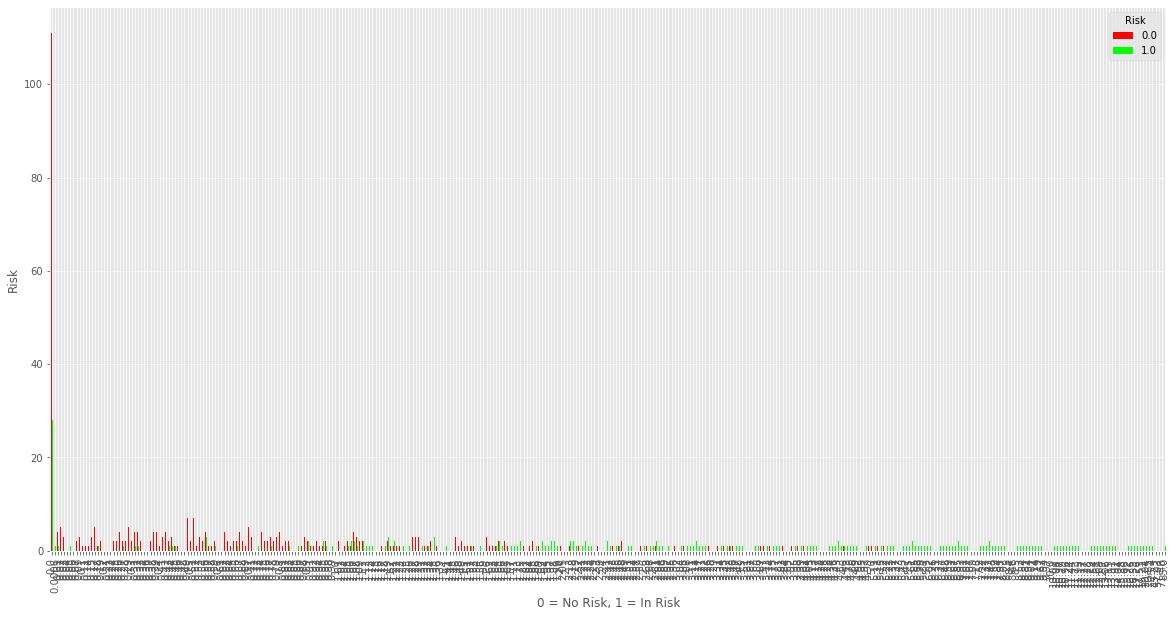

In [101]:
# Create a plot between Risk column with PARA_A column
pd.crosstab(data.PARA_A, data.Risk).plot(kind="bar", 
                                    figsize=(20,10), 
                                    color=["red", "lime"]);
plt.xlabel("0 = No Risk, 1 = In Risk")
plt.ylabel("Risk")

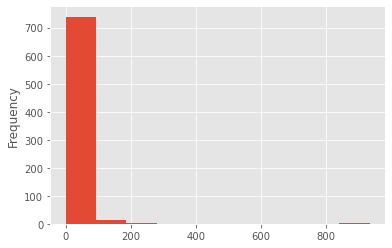

In [102]:
data.Money_Value.plot.hist();

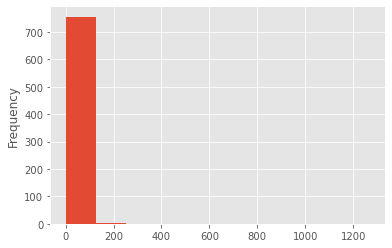

In [103]:
data.TOTAL.plot.hist();

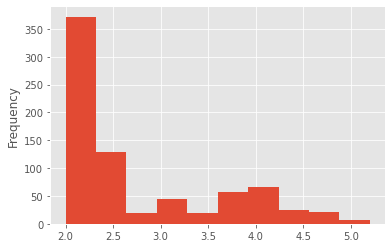

In [104]:
data.Score.plot.hist();

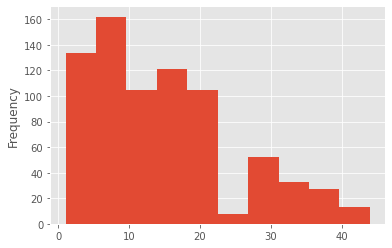

In [106]:
data.LOCATION_ID.plot.hist();

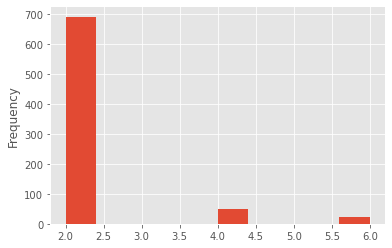

In [107]:
data.Marks.plot.hist();

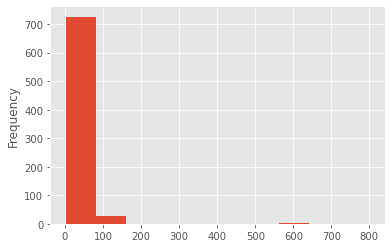

In [108]:
data.Inherent_Risk.plot.hist();

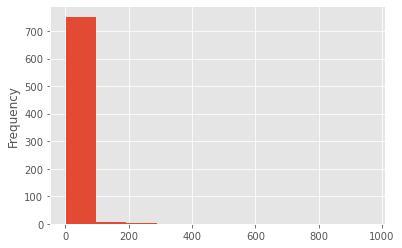

In [109]:
data.Audit_Risk.plot.hist();

# Correlation between independent variables

In [89]:
# Find the correlation between our independent variables
corr_matrix = data.corr()
corr_matrix

,Sector_score,LOCATION_ID,PARA_A,Score_A,PARA_B,Score_B,TOTAL,numbers,Marks,Money_Value,...,Risk_D,District_Loss,PROB,RiSk_E,Prob,Risk_F,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk
Sector_score,1.000000,-0.051794,-0.213811,-0.421641,-0.131503,-0.212795,-0.151850,-0.150368,-0.168660,-0.116026,...,-0.114822,-0.110358,-0.085566,-0.130023,-0.135307,-0.102163,-0.171574,-0.155149,-0.090699,-0.394598
LOCATION_ID,-0.051794,1.000000,-0.006683,0.079342,0.006571,0.125494,0.006489,0.006733,-0.017658,-0.066841,...,-0.066920,-0.105425,-0.003441,-0.096895,-0.054217,-0.089099,-0.046844,-0.124561,-0.086624,0.063133
PARA_A,-0.213811,-0.006683,1.000000,0.493972,0.160441,0.355073,0.265487,0.131895,0.138465,0.448462,...,0.447771,0.127190,0.042365,0.117772,0.170914,0.102678,0.480600,0.147524,0.218696,0.376395
Score_A,-0.421641,0.079342,0.493972,1.000000,0.247596,0.567626,0.295440,0.240088,0.271606,0.203894,...,0.201598,0.086135,0.091382,0.099628,0.263077,0.148952,0.318338,0.167616,0.200284,0.616781
PARA_B,-0.131503,0.006571,0.160441,0.247596,1.000000,0.346339,0.994110,0.208941,0.229836,0.124192,...,0.123851,0.082613,0.041835,0.078764,0.315779,0.195412,0.654034,0.186064,0.887719,0.255977
Score_B,-0.212795,0.125494,0.355073,0.567626,0.346339,1.000000,0.377785,0.275464,0.311398,0.203168,...,0.200303,-0.007660,0.090701,0.012102,0.307683,0.169659,0.363547,0.124880,0.206536,0.633899
TOTAL,-0.151850,0.006489,0.265487,0.295440,0.994110,0.377785,1.000000,0.216565,0.237031,0.167723,...,0.167313,0.092941,0.045629,0.088456,0.325504,0.201421,0.689291,0.196520,0.888049,0.290738
numbers,-0.150368,0.006733,0.131895,0.240088,0.208941,0.275464,0.216565,1.000000,0.908008,0.185258,...,0.185667,0.124836,0.034952,0.136477,0.208547,0.201644,0.269955,0.227956,0.220735,0.306969
Marks,-0.168660,-0.017658,0.138465,0.271606,0.229836,0.311398,0.237031,0.908008,1.000000,0.219330,...,0.219657,0.150249,0.035916,0.157076,0.247275,0.222529,0.307269,0.255776,0.258963,0.352519
Money_Value,-0.116026,-0.066841,0.448462,0.203894,0.124192,0.203168,0.167723,0.185258,0.219330,1.000000,...,0.999911,0.027515,0.031072,0.032174,0.111208,0.068965,0.829537,0.068517,0.333528,0.255892


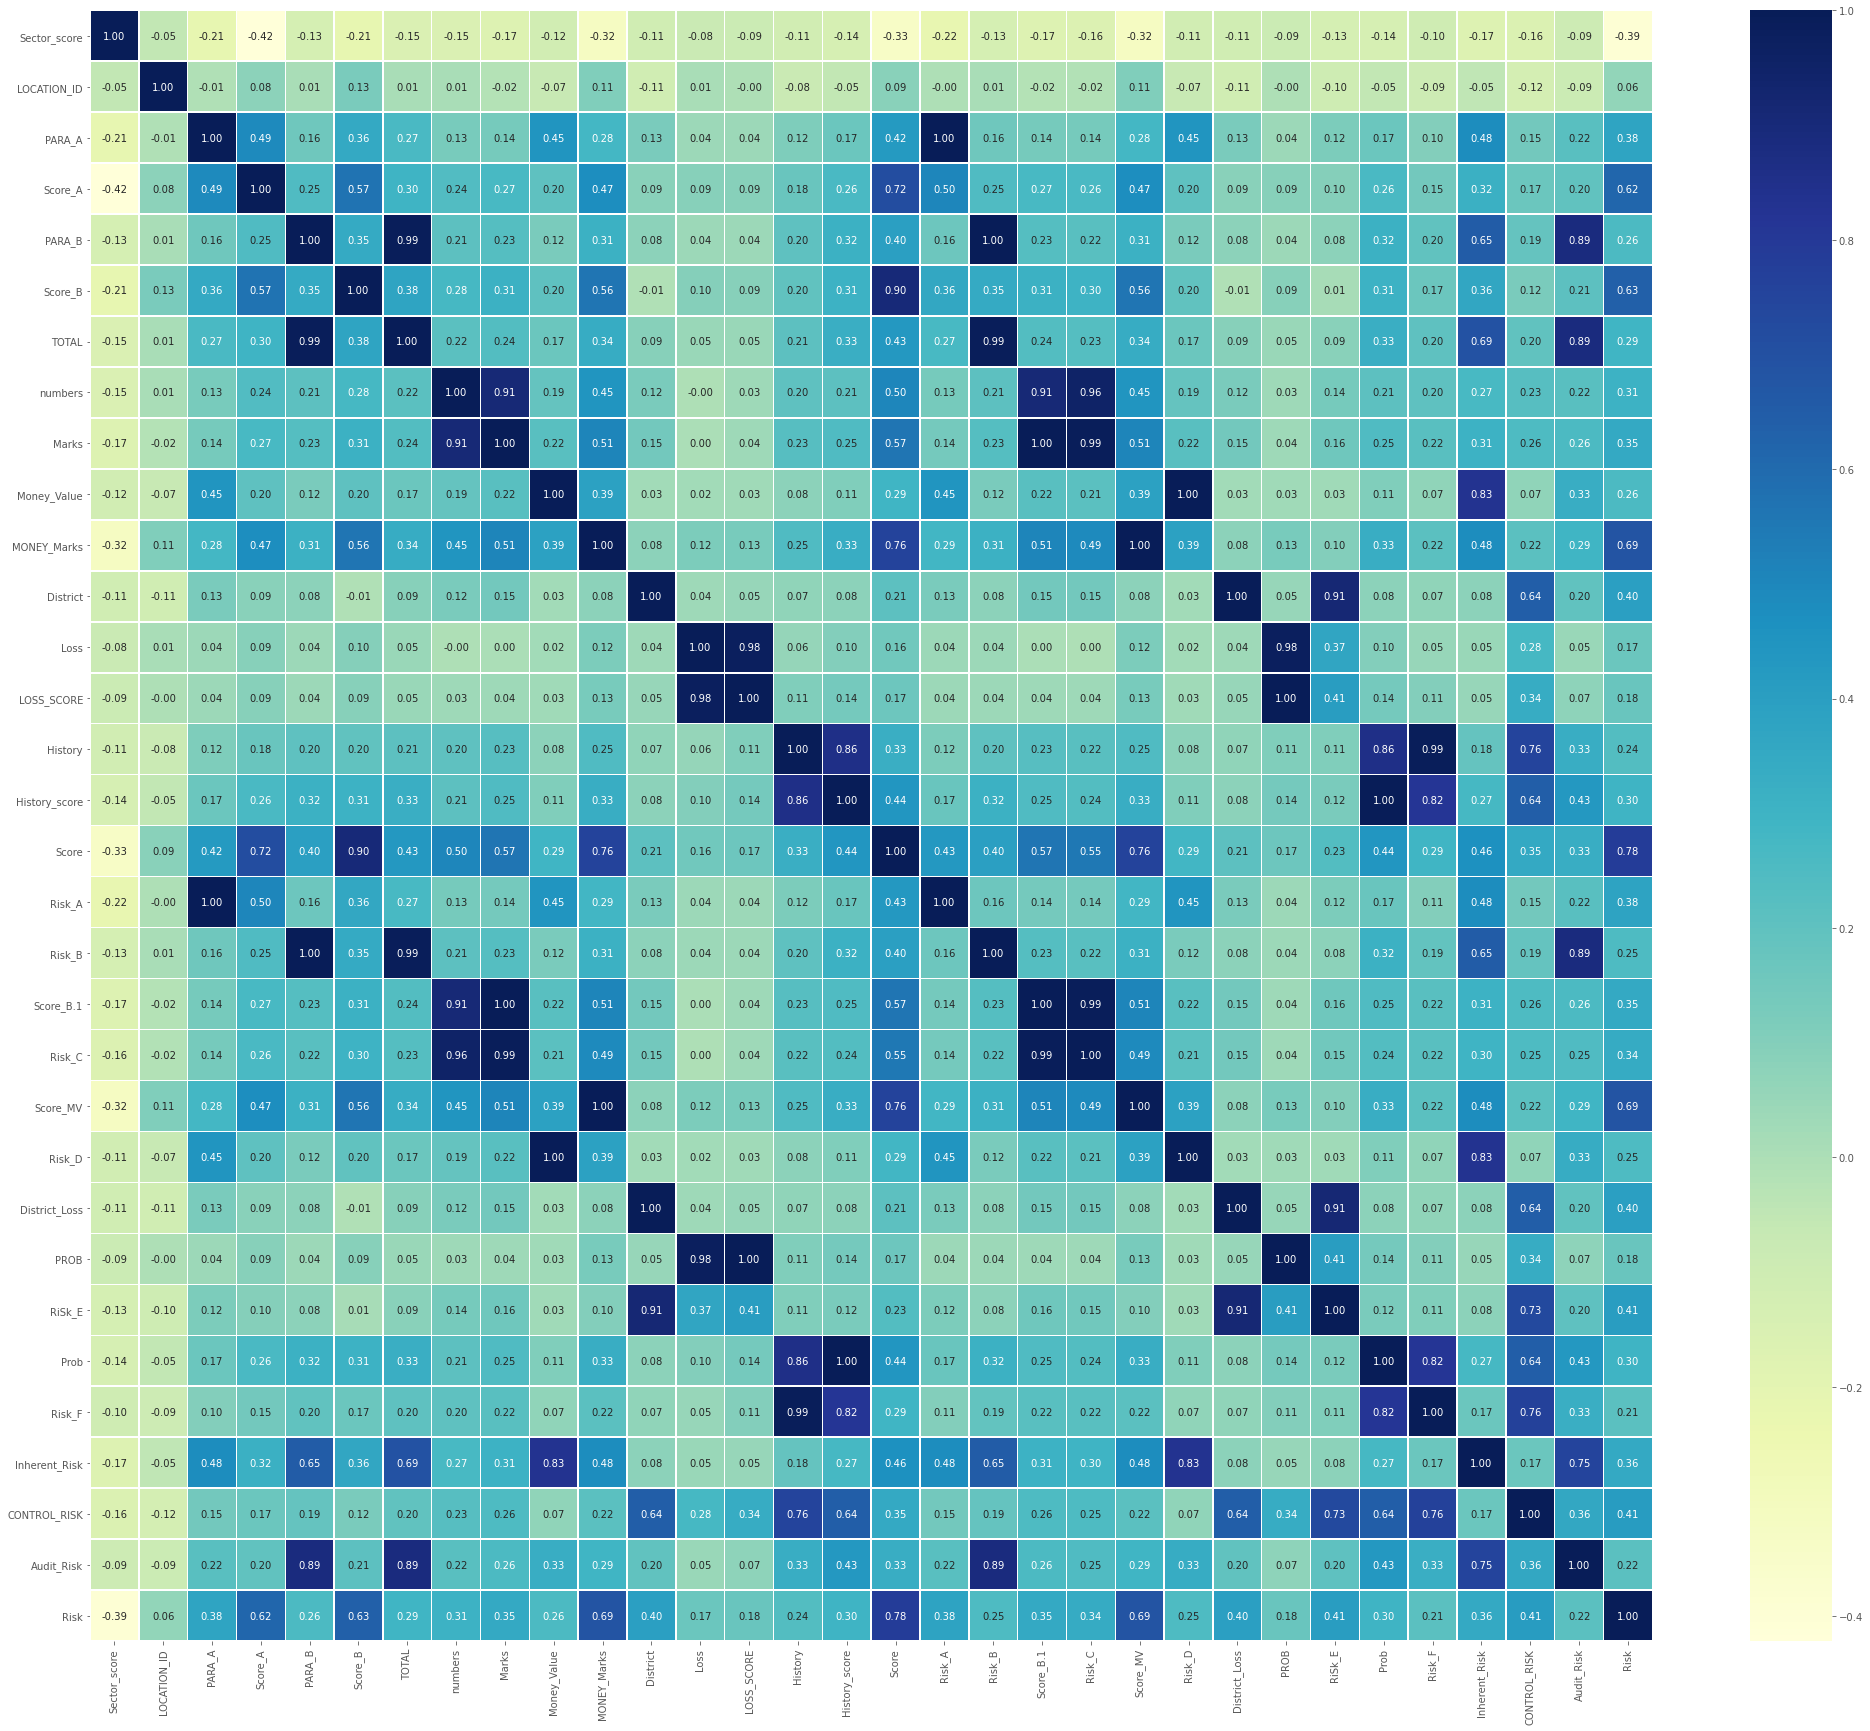

In [116]:
# Let's visulize the co-relation matix with heat map
corr_matrix = data.corr()
plt.figure(figsize=(35, 30))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

# Training and test split

In [3]:
#Creating a new dataframe for classification by deleting the Audit_Risk column.
df = data.drop("Audit_Risk", axis = 1)

In [4]:
X = df.drop(["Risk"], axis = 1)
Y = df["Risk"]

In [5]:
X.head(2)

,Sector_score,LOCATION_ID,PARA_A,Score_A,PARA_B,Score_B,TOTAL,numbers,Marks,Money_Value,...,Risk_C,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,Prob,Risk_F,Inherent_Risk,CONTROL_RISK
0,3.89,23,4.18,0.6,2.50,0.2,6.68,5.0,2,3.38,...,1.0,0.2,0.676,2,0.2,0.4,0.2,0.0,8.574,0.4
1,3.89,6,0.00,0.2,4.83,0.2,4.83,5.0,2,0.94,...,1.0,0.2,0.188,2,0.2,0.4,0.2,0.0,2.554,0.4


In [6]:
Y

0      1
1      0
2      0
3      1
4      0
      ..
755    0
756    0
757    0
758    0
759    0
Name: Risk, Length: 760, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_traino, X_testo, Y_train, Y_test = train_test_split(X, # independent variables 
                                                      Y, # dependent variable
                                                      test_size = 0.2) # percentage of data to use for test set





### Feature Scaling

In [8]:
#MinMax scaling is used to avoid any feature to dominate the model. MinMax scaling scales all the data in the columns between 0 to 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_traino)
X_test  = scaler.transform(X_testo)

In [9]:
len(X_train), len(Y_train)

(608, 608)

In [10]:
len(X_test), len(Y_test)

(152, 152)

# Modeling

### modeling choices
1. Logistic Regression - LogisticRegression()
2. K-Nearest Neighbors - KNeighboursClassifier()
3. RandomForest - RandomForestClassifier()
4. Linear Supprt Vector Machine (not sure / optional)

**Modeling & evaluting in one go
training a model, model.fit(X_train, y_train)
scoring a model model.score(X_test, y_test). score() returns the ratio of correct predictions (1.0 = 100% correct)

In [15]:
from sklearn.svm import SVC
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
           "Linear SVM": SVC()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, Y_train)
        # Evaluate the model and append its score to model_scores on testing data
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

In [16]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             Y_train = Y_train,
                             Y_test = Y_test)
model_scores

{'KNN': 0.9342105263157895,
 'Logistic Regression': 0.9605263157894737,
 'Random Forest': 0.993421052631579,
 'Linear SVM': 0.9539473684210527}

In [17]:
from sklearn.svm import SVC
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
           "Linear SVM": SVC()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores_on_training = {}
    # Make a list to keep model scores
    model_scores_on_testing = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, Y_train)
        # Evaluate the model and append its score to model_scores on training data
        model_scores_on_training[name] = model.score(X_train, Y_train)
        # Evaluate the model and append its score to model_scores on testing data
        model_scores_on_testing[name] = model.score(X_test, Y_test)
    return model_scores_on_training, model_scores_on_testing      

In [18]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             Y_train = Y_train,
                             Y_test = Y_test)
model_scores

({'KNN': 0.9638157894736842,
  'Logistic Regression': 0.9654605263157895,
  'Random Forest': 1.0,
  'Linear SVM': 0.96875},
 {'KNN': 0.9342105263157895,
  'Logistic Regression': 0.9605263157894737,
  'Random Forest': 0.993421052631579,
  'Linear SVM': 0.9539473684210527})

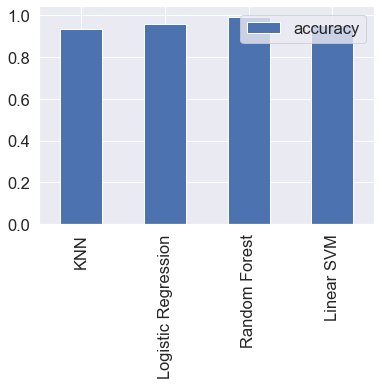

In [172]:
#Model Comparison by plotting them
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

"Random Forest" performs the best.....with over 99% accuracy.¶

# Hyperparameter tuning and cross-validation

as "Random Forest" have the best performace. we will do Hyperparameter tuning and cross-validation just with "Random Forest".

The most common type of cross-validation is k-fold. It involves splitting your data into k-fold's and then testing a model on each. For example, let's say we had 5 folds (k = 5). 

### Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand
The default is 5 (n_neigbors=5)

In [135]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, Y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, Y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, Y_test))

In [136]:
train_scores

[1.0,
 0.9769736842105263,
 0.9819078947368421,
 0.9654605263157895,
 0.9638157894736842,
 0.962171052631579,
 0.962171052631579,
 0.9523026315789473,
 0.9523026315789473,
 0.9457236842105263,
 0.9490131578947368,
 0.9490131578947368,
 0.9506578947368421,
 0.9506578947368421,
 0.9490131578947368,
 0.9506578947368421,
 0.9490131578947368,
 0.9506578947368421,
 0.9473684210526315,
 0.9490131578947368]

Maximum KNN score on the test data: 95.39%


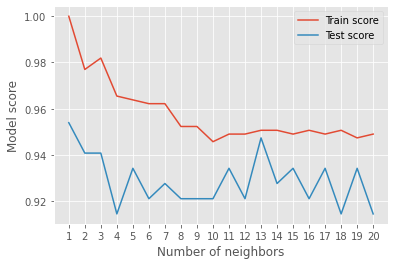

In [137]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Looking at the graph, n_neighbors = 13 seems best.

## Tuning models with with RandomizedSearchCV

Let's create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out.

In [138]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now let's use RandomizedSearchCV to try and tune our LogisticRegression model.

We'll pass it the different hyperparameters from log_reg_grid as well as set n_iter = 20. This means, RandomizedSearchCV will try 20 different combinations of hyperparameters from log_reg_grid and save the best ones.

In [139]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, Y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [140]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 10000.0}

In [141]:
rs_log_reg.score(X_test, Y_test)

0.9802631578947368

Now we've tuned LogisticRegression using RandomizedSearchCV, we'll do the same for RandomForestClassifier.

In [143]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, Y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [144]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_depth': 5}

In [146]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, Y_test)

0.9868421052631579

# Evaluating a classification model, beyond accuracy

In [148]:
# Make preidctions on test data
y_preds = rs_rf.predict(X_test)
y_preds

array([1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.])

In [149]:
Y_test

404    1.0
327    1.0
97     1.0
506    0.0
109    0.0
      ... 
557    0.0
627    0.0
247    1.0
314    0.0
336    0.0
Name: Risk, Length: 152, dtype: float64

# ROC Curve and AUC Scores

we'll use the RandomizedSearchCV version of our RandomForestClassifier estimator, rs_rf as well as the test data, X_test and Y_test.

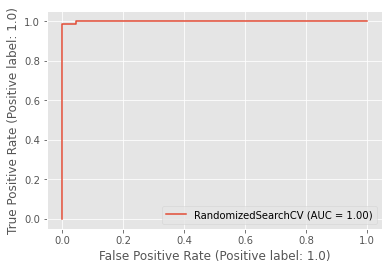

In [150]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_rf, X_test, Y_test);

a perfect model would achieve an AUC score of 1.0 which we did ;)

# Confusion matrix

In [155]:
# Display confusion matrix
print(confusion_matrix(Y_test, y_preds))

[[89  1]
 [ 1 61]]


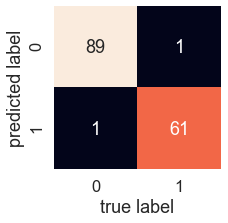

In [156]:
# lets visualize it with heat map
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(Y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(Y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(Y_test, y_preds)


## Classification report

A classification report will also give us information of the precision and recall of our model for each class.

In [157]:
# Show classification report
print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        90
         1.0       0.98      0.98      0.98        62

    accuracy                           0.99       152
   macro avg       0.99      0.99      0.99       152
weighted avg       0.99      0.99      0.99       152



In [158]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_depth': 5}

In [159]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with RandomizedSearchCV)
clf = RandomForestClassifier(n_estimators = 560,
                         min_samples_split = 16,
                         min_samples_leaf = 17,
                         max_depth = 5)

cross-validated metrics...."accuracy"

In [160]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         Y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.97368421, 0.98684211, 0.99342105, 0.98026316, 0.99342105])

In [161]:
#Since there are 5 metrics here, we'll take the average.
cv_acc = np.mean(cv_acc)
cv_acc

0.9855263157894736

Now we'll do the same for other classification metrics....."precision"

In [164]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       Y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.9813431013431014

In [165]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    Y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.983551912568306

In [166]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                Y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.9867725956506108

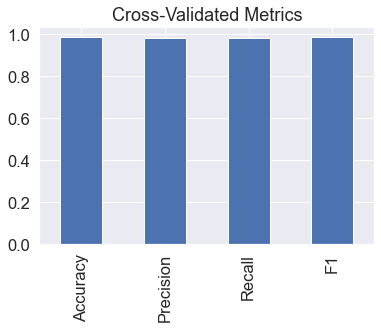

In [167]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);